# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
%config InlineBackend.figure_format = 'svg'

In [236]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
#numerical = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
numerical

['Age', 'Fare', 'SibSp', 'Parch']

In [131]:
#categorical = data.select_dtypes(include = ['object']).columns.tolist()
categorical = ['Sex', 'Cabin', 'Embarked', 'Pclass']
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

## Numerical Features

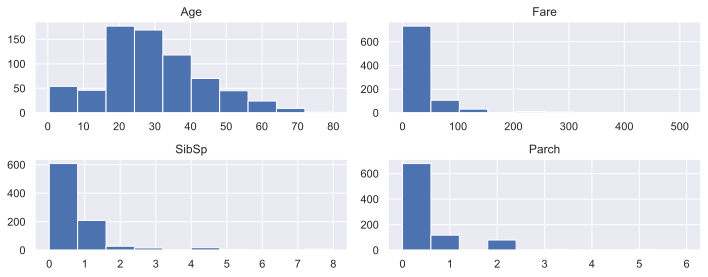

In [133]:
data[numerical].hist(figsize = (10,4))
plt.tight_layout()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

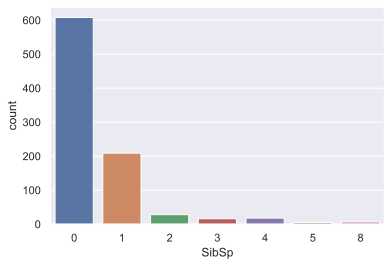

In [146]:
sns.countplot(x = data['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

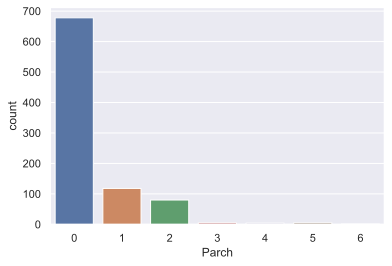

In [150]:
sns.countplot(x = data['Parch'])

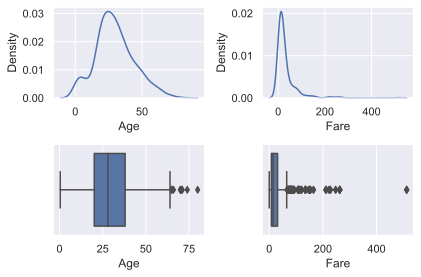

In [141]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['Age'], ax = ax[0,0])
sns.kdeplot(data['Fare'], ax = ax[0,1])
sns.boxplot(x = data['Age'], ax = ax[1,0])
sns.boxplot(x = data['Fare'], ax = ax[1,1])

plt.tight_layout()

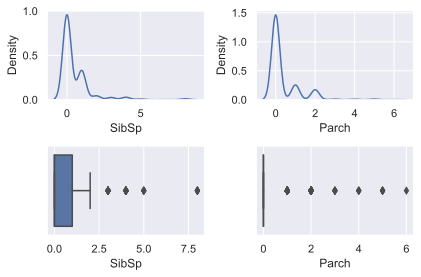

In [142]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['SibSp'], ax = ax[0,0])
sns.kdeplot(data['Parch'], ax = ax[0,1])
sns.boxplot(x = data['SibSp'], ax = ax[1,0])
sns.boxplot(x = data['Parch'], ax = ax[1,1])

plt.tight_layout()

In [144]:
# for feature in [ 'Pclass', 'Parch', 'SibSp']:
#     print(feature)
#     print(data[feature].value_counts())

## Categorical Features

In [98]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [107]:
for feature in categorical:
    print('feature ' + feature + ' has unique values:')
    print(data[feature].nunique())
    print()

feature Name has unique values:
891

feature Sex has unique values:
2

feature Ticket has unique values:
681

feature Cabin has unique values:
147

feature Embarked has unique values:
3



In [108]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

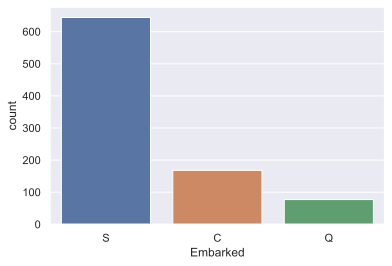

In [110]:
sns.countplot(x = data['Embarked'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

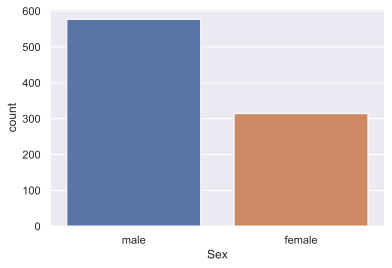

In [159]:
sns.countplot(x = data['Sex'])

## Correlation and Target Variable

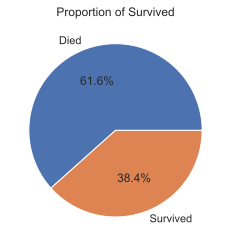

In [157]:
plt.pie(data['Survived'].value_counts(), labels = ['Died', 'Survived'], autopct = '%1.1f%%')
plt.title('Proportion of Survived')
plt.show()

<AxesSubplot:>

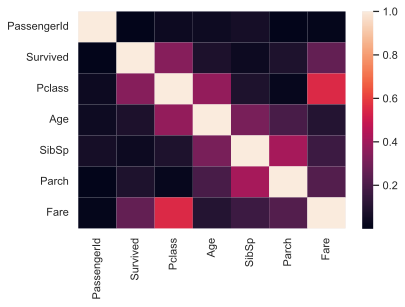

In [112]:
sns.heatmap(data.corr().abs())

### Categorical

In [160]:
categorical

['Sex', 'Cabin', 'Embarked', 'Pclass']

<AxesSubplot:xlabel='Pclass', ylabel='count'>

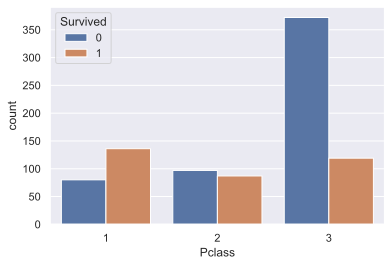

In [115]:
sns.countplot(x = data['Pclass'], hue = data['Survived'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

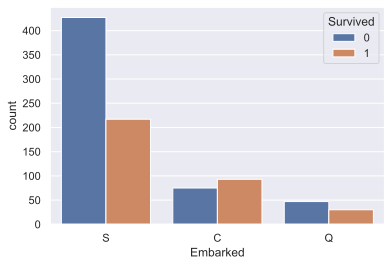

In [152]:
sns.countplot(x = data['Embarked'], hue = data['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

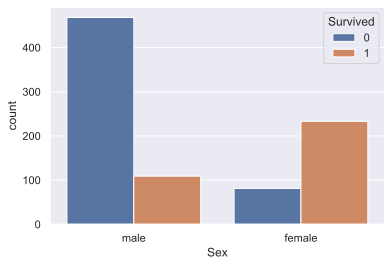

In [155]:
sns.countplot(x = data['Sex'], hue = data['Survived'])

### Numerical

In [156]:
numerical

['Age', 'Fare', 'SibSp', 'Parch']

(0.0, 600.0)

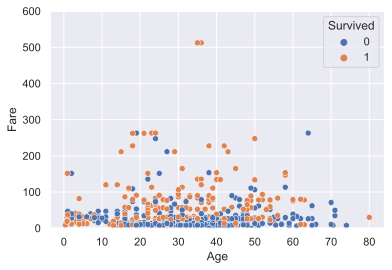

In [188]:
sns.scatterplot(x = data['Age'], y = data['Fare'], hue = data['Survived'] )
plt.ylim(0,600)

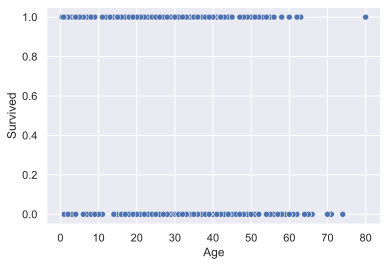

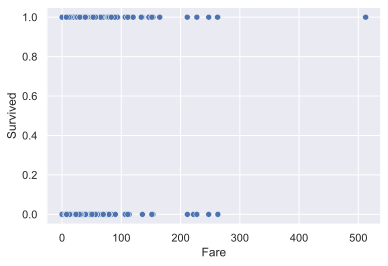

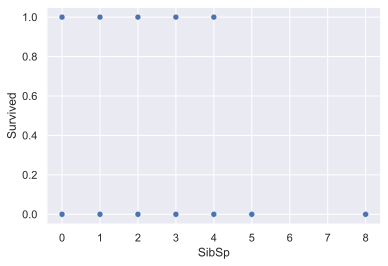

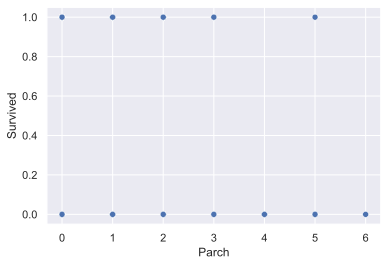

In [201]:
sns.scatterplot(x = data['Age'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Fare'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['SibSp'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Parch'], y = data['Survived'])
plt.show()

# Missing Values

In [238]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [239]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [240]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [242]:
data.dropna( axis = 0)

C:\Users\Aidyn\AppData\Local\Temp/ipykernel_16040/1315387664.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  data.dropna(data['Embarked'], axis = 0)


TypeError: dropna() got multiple values for argument 'axis'

In [235]:
data

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object